### Create and load xCos model

In [1]:
import torch
import numpy as np
from torchvision.utils import make_grid
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image

from mtcnn_pytorch.crop_and_aligned import mctnn_crop_face
from model.model import xCosModel
from utils.util import batch_visualize_xcos

img1 = '../datasets/visualization/gakki/gakki4.jpg'
img2 = '../datasets/visualization/gakki/gakki2.jpg'

model = xCosModel()
pretrained_path = '../pretrained_model/xcos/20200217_accu_9931_Arcface.pth'
checkpoint = torch.load(pretrained_path)
model.load_state_dict(checkpoint['state_dict'], strict=False)
model.eval()

_IncompatibleKeys(missing_keys=['head.kernel'], unexpected_keys=[])

In [2]:
%matplotlib inline
def show(img):
    plt.figure(figsize=(14, 24))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [3]:
transforms_mine = transforms.Compose([
        transforms.Resize([112, 112]),
        transforms.ToTensor(),
        transforms.Normalize([.5, .5, .5], [.5, .5, .5]),
    ])

dict_keys(['flatten_feats', 'grid_feats', 'x_coses', 'attention_maps', 'grid_cos_maps'])
[2020-05-11 20:53:59] {utils.py:141} INFO - NumExpr defaulting to 8 threads.
>>>> visual.shape torch.Size([1, 3, 300, 1400])


<Figure size 432x288 with 0 Axes>

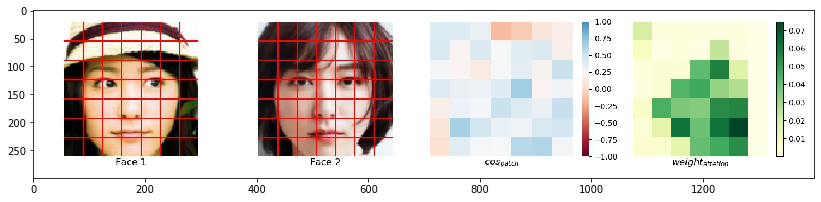

In [4]:
img1 = Image.open(img1).convert('RGB')
img2 = Image.open(img2).convert('RGB')
# In fact, BGR2RGB=True turn RGB into BGR
img1 = mctnn_crop_face(img1, BGR2RGB=False)
img2 = mctnn_crop_face(img2, BGR2RGB=False)
img1 = transforms_mine(img1)
img2 = transforms_mine(img2)
imgs_tensor = torch.stack([img1, img2])

data = {}
data['data_input'] = imgs_tensor.unsqueeze(1)
######
model_output = model(data, scenario="get_feature_and_xcos")
print(model_output.keys())
img1s, img2s = data['data_input']
img1s = img1s.cpu().numpy()
img2s = img2s.cpu().numpy()

grid_cos_maps = model_output['grid_cos_maps'].squeeze().detach().cpu().unsqueeze(0).numpy()
attention_maps = model_output['attention_maps'].squeeze().detach().cpu().unsqueeze(0).numpy()
visualizations = batch_visualize_xcos(img1s, img2s, grid_cos_maps, attention_maps)
print('>>>> visual.shape', visualizations[0].size())
show(make_grid(torch.cat(visualizations), padding=1, nrow=1))

    
